# Self Organizing Map

* Type of unsupervised deep-learning
* a.k.a. Kohonen Maps
* Dimensionality reduction (3D -> 2D)
* Calculates Euclidean distance between weights for each node to find the best organizing unit for each iteration
  * Radius around that point updates all weights to pull them closer
  * Competing BMU's can pull points equally creating a boundary between the BMU's
* Retain topology of the input set
* Reveal correlations (features) that are not easily identified
* Classify data without supervision (no labels)
* No target vector, so no backpropagation (no error)
* No lateral connections between output nodes
* [Kohonen's Self Organizing Feature Maps](http://www.ai-junkie.com/ann/som/som1.html)

* Random Initialization Trap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import dirname, abspath, join, curdir

In [2]:
# Import the dataset
datapath = join(dirname(dirname(abspath(curdir))), "data", "raw")

dataset = pd.read_csv(join(datapath, "Credit_Card_Applications.csv"))
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
# Split out feature set
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X.shape, y.shape

((690, 15), (690,))

In [4]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)
X_scaled

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [5]:
# Training the SOM
from minisom import MiniSom

som = MiniSom(x=10, 
              y=10, 
              input_len=X_scaled.shape[1],
              sigma=1.0,
              learning_rate=0.5)

som.random_weights_init(X_scaled)
som.train_random(X_scaled, num_iteration=100)

In [6]:
som.distance_map()

array([[0.25155897, 0.44126141, 0.42512328, 0.38656875, 0.38610357,
        0.51939798, 0.4660849 , 0.43265677, 0.32301702, 0.16548701],
       [0.47526282, 0.77203805, 0.82141863, 0.67711064, 0.63799696,
        0.70392578, 0.76057533, 0.65764692, 0.54948696, 0.23676246],
       [0.48327909, 1.        , 0.89580008, 0.76243689, 0.66167624,
        0.62940617, 0.68588052, 0.65641468, 0.52375475, 0.28944036],
       [0.49446997, 0.80054945, 0.81706794, 0.74590629, 0.66010609,
        0.59392172, 0.59146579, 0.66862915, 0.67096619, 0.43175244],
       [0.4103896 , 0.60661352, 0.724309  , 0.62503592, 0.54868453,
        0.51697661, 0.50991584, 0.58094629, 0.77955982, 0.65871188],
       [0.23201092, 0.53067798, 0.5479124 , 0.62848074, 0.61534587,
        0.53618152, 0.50832438, 0.54063535, 0.64923832, 0.48088847],
       [0.27137667, 0.51545501, 0.54132278, 0.7165834 , 0.68114354,
        0.6414787 , 0.61695587, 0.61312931, 0.56505239, 0.44989179],
       [0.49754918, 0.77692131, 0.7043178

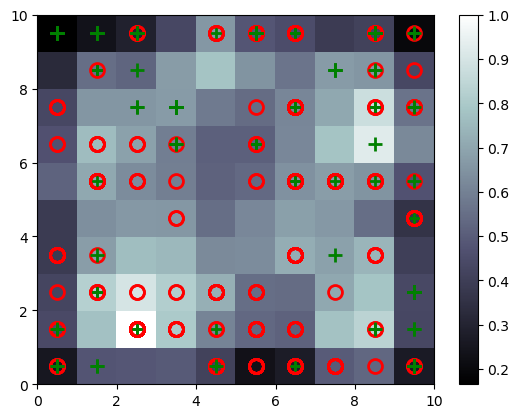

In [7]:
# Visualize the SOM
from pylab import bone, pcolor, colorbar, plot, show

markers = ['o', '+']
colors = ['r', 'g']

bone()
pcolor(som.distance_map().T)
colorbar()

# Label each customer by approval status
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor="None",
         markersize=10,
         markeredgewidth=2)
show()

In [15]:
# Output the potential fraudulent users
mappings = som.win_map(X_scaled)
fraud_pot = np.concatenate((mappings[(2, 1)], mappings[(8, 6)]), axis=0)
fraud_pot = sc.inverse_transform(fraud_pot)
fraud_pot.shape

(33, 15)

In [18]:
# Make a supervised deep learning model using the unsupervised data map
customers = dataset.iloc[:, 1:].values

# Create the dependent variable using the list of potential fraudulent customers
is_fraud = np.zeros(len(dataset))

for i in range(len(dataset)):
    if dataset.iloc[i, 0] in fraud_pot:
        is_fraud[i] = 1

is_fraud

In [20]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers_scaled = sc.fit_transform(customers)

In [21]:
# Initialize the ANN
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

# Add the input layer and the first hidden layer
ann.add(Dense(units=2, kernel_initializer='uniform', activation='relu', input_dim=15))

# Add the output layer
ann.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
ann.fit(customers_scaled, is_fraud, batch_size=1, epochs=10)


Epoch 1/10
690/690 [==============================] - 1s 874us/step - loss: 0.5202 - accuracy: 0.9493
Epoch 2/10
690/690 [==============================] - 1s 797us/step - loss: 0.2270 - accuracy: 0.9522
Epoch 3/10
690/690 [==============================] - 1s 867us/step - loss: 0.1293 - accuracy: 0.9522
Epoch 4/10
690/690 [==============================] - 1s 762us/step - loss: 0.1093 - accuracy: 0.9522
Epoch 5/10
690/690 [==============================] - 1s 769us/step - loss: 0.0986 - accuracy: 0.9522
Epoch 6/10
690/690 [==============================] - 1s 763us/step - loss: 0.0924 - accuracy: 0.9522
Epoch 7/10
690/690 [==============================] - 1s 766us/step - loss: 0.0866 - accuracy: 0.9522
Epoch 8/10
690/690 [==============================] - 1s 768us/step - loss: 0.0826 - accuracy: 0.9522
Epoch 9/10
690/690 [==============================] - 1s 772us/step - loss: 0.0785 - accuracy: 0.9522
Epoch 10/10
690/690 [==============================] - 1s 757us/step - loss: 0.075

In [ ]:
y_pred = ann.predict(customers_scaled)